In [ ]:
pip install duckdb matplotlib seaborn pandas

In [1]:
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter

In [2]:
## Helper functions
def format_large_numbers(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    return f'{x:.0f}'

usd_formatter = FuncFormatter(format_large_numbers)

def plot_styled_barchart(df, x, y, title):
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df, x=x, y=y, palette='viridis')
    plt.title(title, fontsize=14, pad=20)
    ax.xaxis.set_tick_params(rotation=45)
    ax.yaxis.set_major_formatter(usd_formatter)
    plt.tight_layout()
    plt.show()
    
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [3]:
# Connect to DuckDB (
con = duckdb.connect('blockchain.duckdb')

# Create schemas if they do not exist
con.execute("CREATE SCHEMA IF NOT EXISTS staging;")
con.execute("CREATE SCHEMA IF NOT EXISTS reporting;")

# Load CSV as all VARCHAR into a staging table for swaps
con.execute("""
CREATE OR REPLACE TABLE staging.swaps AS
SELECT * FROM read_csv_auto('/Users/jabulaninyoni/Documents/BBTest/swaps.csv', all_varchar=True, header=True);
""")

In [4]:
# Create the final table for swaps by casting each column
con.execute("""
CREATE OR REPLACE TABLE reporting.swaps AS
SELECT
    chain,
    protocol,
    CAST(block_number AS BIGINT) AS block_number,
    CAST(block_timestamp AS TIMESTAMP) AS block_timestamp,
    hash,
    CAST(log_index AS BIGINT) AS log_index,
    txn_from,
    txn_to,
    pool_address,
    token0,
    token1,
    CAST(fee_perc AS DOUBLE) AS fee_perc,
    account,
    token_bought,
    token_sold,
    CAST(amt_tokens_bought AS HUGEINT) AS amt_tokens_bought,
    CAST(amt_tokens_sold AS HUGEINT) AS amt_tokens_sold
FROM staging.swaps
;
""")
swaps = con.execute("SELECT * FROM reporting.swaps LIMIT 5").fetchdf()
swaps

,chain,protocol,block_number,block_timestamp,hash,log_index,txn_from,txn_to,pool_address,token0,token1,fee_perc,account,token_bought,token_sold,amt_tokens_bought,amt_tokens_sold
0,base,pancake-v3,25789327,2025-02-01 00:00:01,0x1afc0a141a0bc99a60cbe1935aedc3b4d9d199a7bae5...,83,0xecd6966ebba0b5eb68dc6438e029e94e932ffd59,0xcaef91f01871f66a824505e7de8e376ffa9bfb49,0x72ab388e2e2f6facef59e3c3fa2c4e29011c2d38,0x4200000000000000000000000000000000000006,0x833589fcd6edb6e08f4c7c32d4f71b54bda02913,0.01,0xcaef91f01871f66a824505e7de8e376ffa9bfb49,0x4200000000000000000000000000000000000006,0x833589fcd6edb6e08f4c7c32d4f71b54bda02913,"469,159,140,550,698,944.00","1,548,038,553.00"
1,base,pancake-v3,25789327,2025-02-01 00:00:01,0x57d2c01cbf1f53c4ea2b9b684a1bb88c458985c1cbbe...,110,0x7470a213536b7fb86a84e31c148ef11a1dd3ca52,0x48335da3c7ebe9d09cb667e619b86e8787a06c14,0x72ab388e2e2f6facef59e3c3fa2c4e29011c2d38,0x4200000000000000000000000000000000000006,0x833589fcd6edb6e08f4c7c32d4f71b54bda02913,0.01,0x6a57a0579e91a5b7ce9c2d08b93e1a9b995f974f,0x833589fcd6edb6e08f4c7c32d4f71b54bda02913,0x4200000000000000000000000000000000000006,"10,106,856.00","3,063,448,270,934,631.00"
2,base,pancake-v3,25789327,2025-02-01 00:00:01,0x018f67f53a81303a6ac08b00e0d2895e3191678e5c46...,86,0x825c00033ce6d6899cceac0a4e75c156cbffae26,0xcaef91f01871f66a824505e7de8e376ffa9bfb49,0xc211e1f853a898bd1302385ccde55f33a8c4b3f3,0x4200000000000000000000000000000000000006,0xcbb7c0000ab88b473b1f5afd9ef808440eed33bf,0.01,0xcaef91f01871f66a824505e7de8e376ffa9bfb49,0x4200000000000000000000000000000000000006,0xcbb7c0000ab88b473b1f5afd9ef808440eed33bf,"273,390,180,937,914,976.00","880,850.00"
3,base,pancake-v3,25789328,2025-02-01 00:00:03,0x41400396e2d44c1a6509dd0ab221927826a875d32ad4...,313,0x6c23249f4d868b75819d554f60bcc4b11bd6147c,0x6131b5fae19ea4f9d964eac0408e4408b66337b5,0xb94b22332abf5f89877a14cc88f2abc48c34b3df,0x833589fcd6edb6e08f4c7c32d4f71b54bda02913,0xcbb7c0000ab88b473b1f5afd9ef808440eed33bf,0.01,0xc7d3ab410d49b664d03fe5b1038852ac852b1b29,0x833589fcd6edb6e08f4c7c32d4f71b54bda02913,0xcbb7c0000ab88b473b1f5afd9ef808440eed33bf,"171,959,734.00","167,966.00"
4,base,pancake-v3,25789328,2025-02-01 00:00:03,0x1dd90d6b7fc034f33c51d47536c1985770deb9465a5b...,432,0x02e91065a360fc2b567af0636fee96f0f598f345,0x0000000000e6a41ae0e9b9369378dedc44b46022,0x72ab388e2e2f6facef59e3c3fa2c4e29011c2d38,0x4200000000000000000000000000000000000006,0x833589fcd6edb6e08f4c7c32d4f71b54bda02913,0.01,0x498581ff718922c3f8e6a244956af099b2652b2b,0x833589fcd6edb6e08f4c7c32d4f71b54bda02913,0x4200000000000000000000000000000000000006,"142,967,083.00","43,334,546,146,998,128.00"


In [5]:
#create  dimension tables
con.execute("""
CREATE TABLE IF NOT EXISTS reporting.tokens (
    token VARCHAR,
    symbol VARCHAR,
    decimals BIGINT,
    id INT
);
""")

con.execute("""
CREATE TABLE IF NOT EXISTS reporting.prices (
    dollar_date_use TIMESTAMP,
    id INT,
    rate_close DOUBLE
);
""")
# Load dimensions
con.execute("""
COPY reporting.tokens FROM '/Users/jabulaninyoni/Documents/BBTest/tokens.csv' (HEADER, DELIMITER ',');
""")

con.execute("""
COPY reporting.prices FROM '/Users/jabulaninyoni/Documents/BBTest/prices.csv' (HEADER, DELIMITER ',');
""")

In [6]:
#check tokens data
tokens = con.execute("SELECT * FROM reporting.tokens LIMIT 5").fetchdf()
tokens

,token,symbol,decimals,id
0,0x2c8c89c442436cc6c0a77943e09c8daf49da3161,ZBU,18,27765
1,0x768be13e1680b5ebe0024c42c896e3db59ec0149,SKI,9,31173
2,0x1c4cca7c5db003824208adda61bd749e55f463a3,GAME,18,34647
3,0xb1a03eda10342529bbf8eb700a06c60441fef25d,MIGGLES,18,32289
4,0x6985884c4392d348587b19cb9eaaf157f13271cd,ZRO,18,26997


In [7]:
#check prices data
prices = con.execute("SELECT * FROM reporting.prices LIMIT 5").fetchdf()
prices

,dollar_date_use,id,rate_close
0,2025-02-01 00:00:00,29420,1.97
1,2025-02-01 01:00:00,29420,1.97
2,2025-02-01 02:00:00,29420,2.02
3,2025-02-01 03:00:00,29420,2.04
4,2025-02-01 04:00:00,29420,2.01


In [8]:
##What is the volume split across protocols during the period (number of trades and USD value)?
volume_df = con.execute("""
WITH swap_values AS (
    SELECT 
        s.protocol,
        (s.amt_tokens_sold / POWER(10, t_sold.decimals)) * p_sold.rate_close AS usd_value_sold,
        (s.amt_tokens_bought / POWER(10, t_bought.decimals)) * p_bought.rate_close AS usd_value_bought
    FROM reporting.swaps s
    JOIN reporting.tokens t_sold ON s.token_sold = t_sold.token
    JOIN reporting.tokens t_bought ON s.token_bought = t_bought.token
    JOIN reporting.prices p_sold 
        ON t_sold.id = p_sold.id 
        AND DATE_TRUNC('hour', s.block_timestamp) = p_sold.dollar_date_use
    JOIN reporting.prices p_bought 
        ON t_bought.id = p_bought.id 
        AND DATE_TRUNC('hour', s.block_timestamp) = p_bought.dollar_date_use
)
SELECT
    protocol,
    COUNT(*) AS num_trades,
    SUM(usd_value_sold) as usd_value_sold,
    SUM(usd_value_bought) as usd_value_bought,
    SUM(usd_value_sold + usd_value_bought) AS total_volume_usd
FROM swap_values
GROUP BY protocol
ORDER BY total_volume_usd DESC;
""").fetchdf()

print("Protocol Volume Analysis (USD value):")
display(volume_df)

Protocol Volume Analysis (USD value):


,protocol,num_trades,usd_value_sold,usd_value_bought,total_volume_usd
0,aerodrome-ss,257723712,"2,244,855,839,685.76","2,242,865,828,969.36","4,487,721,668,648.49"
1,uniswap-v3,341847072,"612,086,043,319.22","611,521,370,958.68","1,223,607,414,277.22"
2,pancake-v3,562713120,"257,589,432,424.53","257,499,780,435.61","515,089,212,860.18"
3,sushi-v3,67419072,"72,826,414,180.33","72,735,280,730.87","145,561,694,911.24"
4,uniswap-v2,100877328,"44,333,017,874.56","44,098,388,647.68","88,431,406,522.22"


/var/folders/d5/s2dpx1h57fx8pwt_52k13d7c0000gn/T/ipykernel_15114/373240557.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x=x, y=y, palette='viridis')


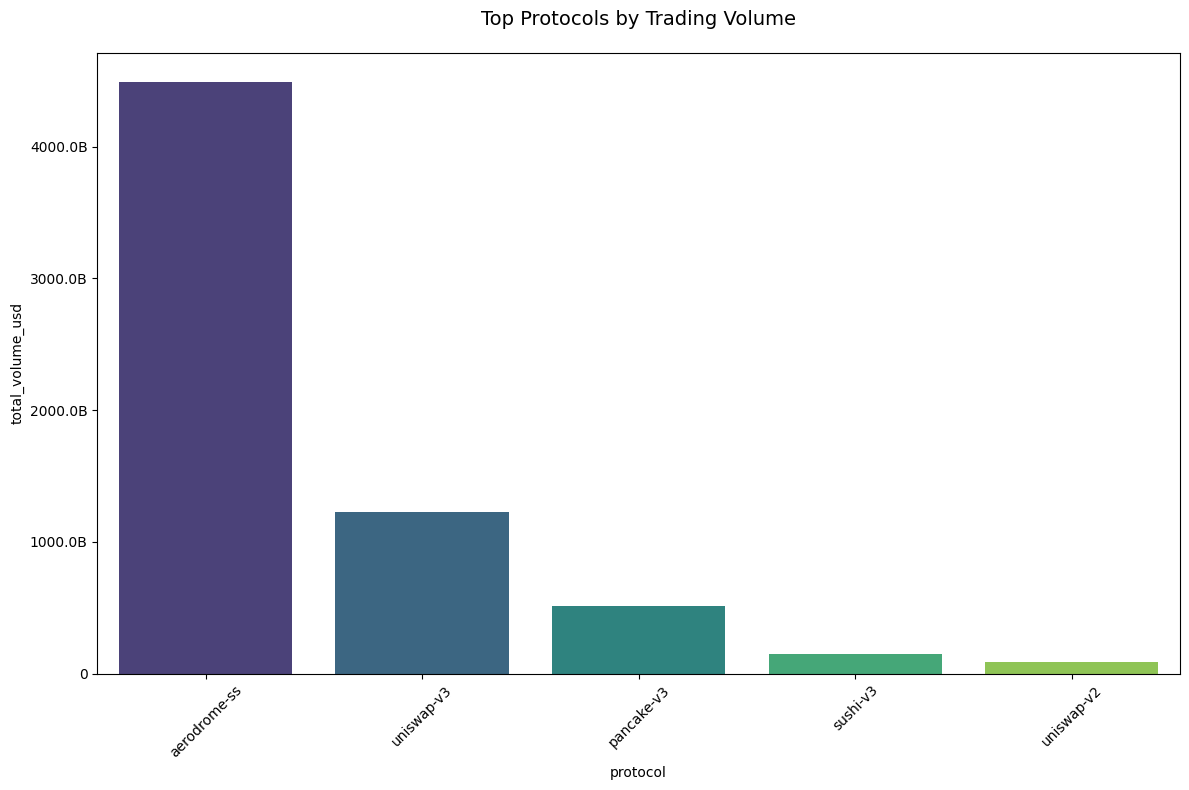

In [9]:

plot_styled_barchart(volume_df, 'protocol', 'total_volume_usd', 
                    'Top Protocols by Trading Volume')

/var/folders/d5/s2dpx1h57fx8pwt_52k13d7c0000gn/T/ipykernel_15114/373240557.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x=x, y=y, palette='viridis')


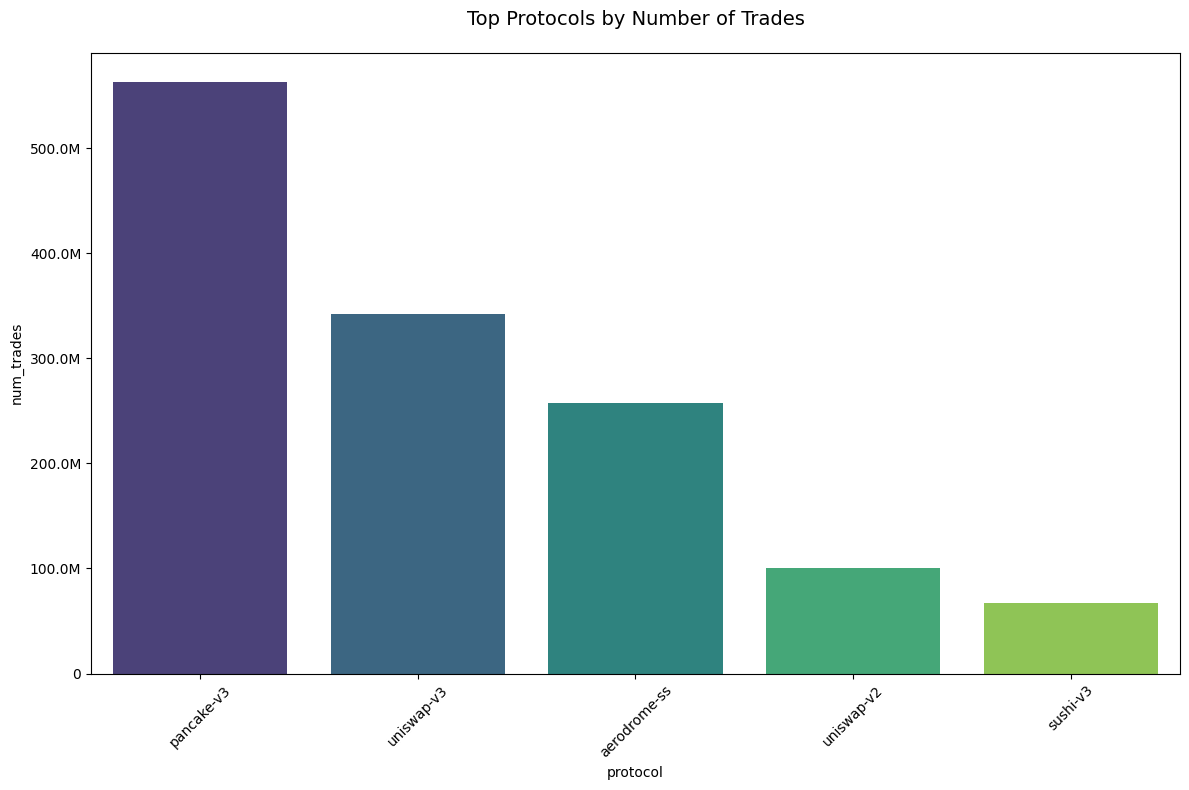

In [10]:
# Sort the dataframe by 'num_trades' in descending order
volume_df_sorted = volume_df.sort_values(by='num_trades', ascending=False)
#plot the values
plot_styled_barchart(volume_df_sorted, 'protocol', 'num_trades', 
                    'Top Protocols by Number of Trades')

In [11]:
#What is the typical size of a trade in USD value?
size_stats = con.execute("""
SELECT 
    approx_quantile(usd_value_sold, [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]) AS quantiles
FROM (
    SELECT 
        (s.amt_tokens_sold / POWER(10, t_sold.decimals)) * p_sold.rate_close AS usd_value_sold
    FROM reporting.swaps s
    JOIN reporting.tokens t_sold ON s.token_sold = t_sold.token
    JOIN reporting.prices p_sold 
        ON t_sold.id = p_sold.id 
        AND DATE_TRUNC('hour', s.block_timestamp) = p_sold.dollar_date_use
)
""").fetchone()[0]

print(f"""
Trade Size Percentiles (USD):
25th: ${size_stats[0]:,.2f}
50th (Median): ${size_stats[1]:,.2f}
75th: ${size_stats[2]:,.2f}
90th: ${size_stats[3]:,.2f}
95th: ${size_stats[4]:,.2f}
99th: ${size_stats[5]:,.2f}
""")


Trade Size Percentiles (USD):
25th: $68.06
50th (Median): $330.60
75th: $1,008.59
90th: $5,072.77
95th: $11,453.85
99th: $39,274.12



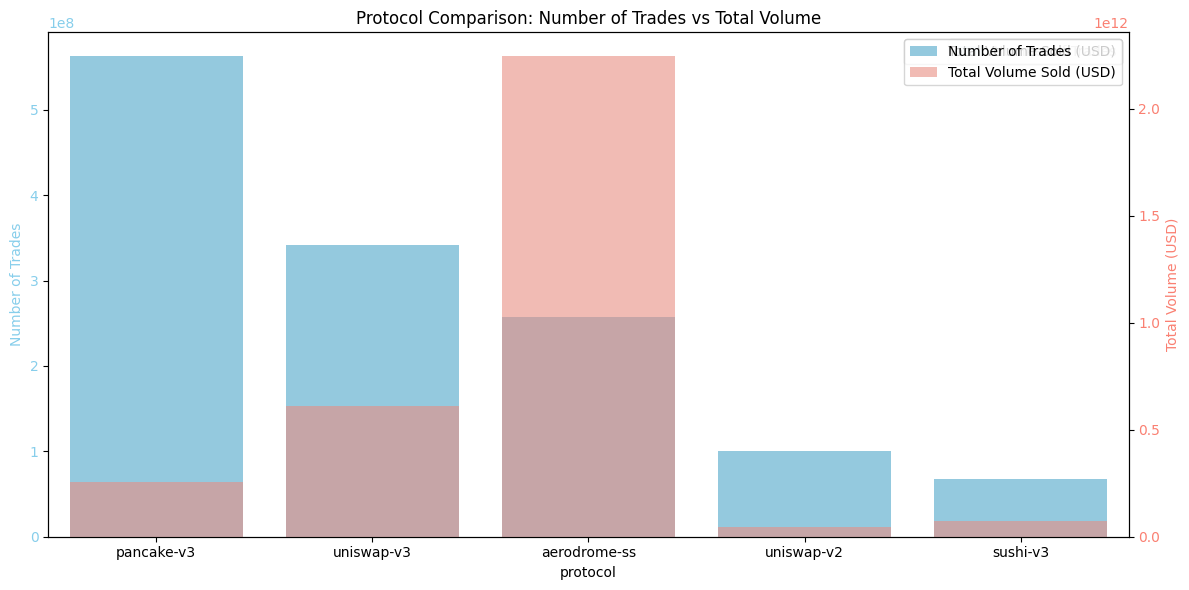

,protocol,num_trades,usd_value_sold,avg_trade_size_usd
0,aerodrome-ss,257723712,"2,244,855,839,685.76","8,710.32"
1,uniswap-v3,341847072,"612,086,043,319.22","1,790.53"
2,pancake-v3,562713120,"257,589,432,424.53",457.76
3,sushi-v3,67419072,"72,826,414,180.33","1,080.20"
4,uniswap-v2,100877328,"44,333,017,874.56",439.47


In [12]:
# Calculate average trade size per protocol and compare it to the volume
volume_df['avg_trade_size_usd'] = volume_df['usd_value_sold'] / volume_df['num_trades']

# Plot: Number of Trades vs Total Volume per Protocol
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of trades 
sns.barplot(
    data=volume_df.sort_values('num_trades', ascending=False),
    x='protocol', y='num_trades', color='skyblue', label='Number of Trades', ax=ax1
)
ax1.set_ylabel('Number of Trades', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Bar plot for total volume 
ax2 = ax1.twinx()
sns.barplot(
    data=volume_df.sort_values('num_trades', ascending=False),
    x='protocol', y='usd_value_sold', color='salmon', alpha=0.6, label='Total Volume Sold (USD)', ax=ax2
)
ax2.set_ylabel('Total Volume (USD)', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

plt.title('Protocol Comparison: Number of Trades vs Total Volume')
plt.xlabel('Protocol')
plt.xticks(rotation=45)
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

display(volume_df[['protocol', 'num_trades', 'usd_value_sold', 'avg_trade_size_usd']])

In [ ]:
#pancake has a large number of trades but pretty small volume compared to aerodrome-ss. 
#aerodrome has largest volume but not a lot of trades.
#seems aerodrome-ss would probably be attractive for seasoned tr

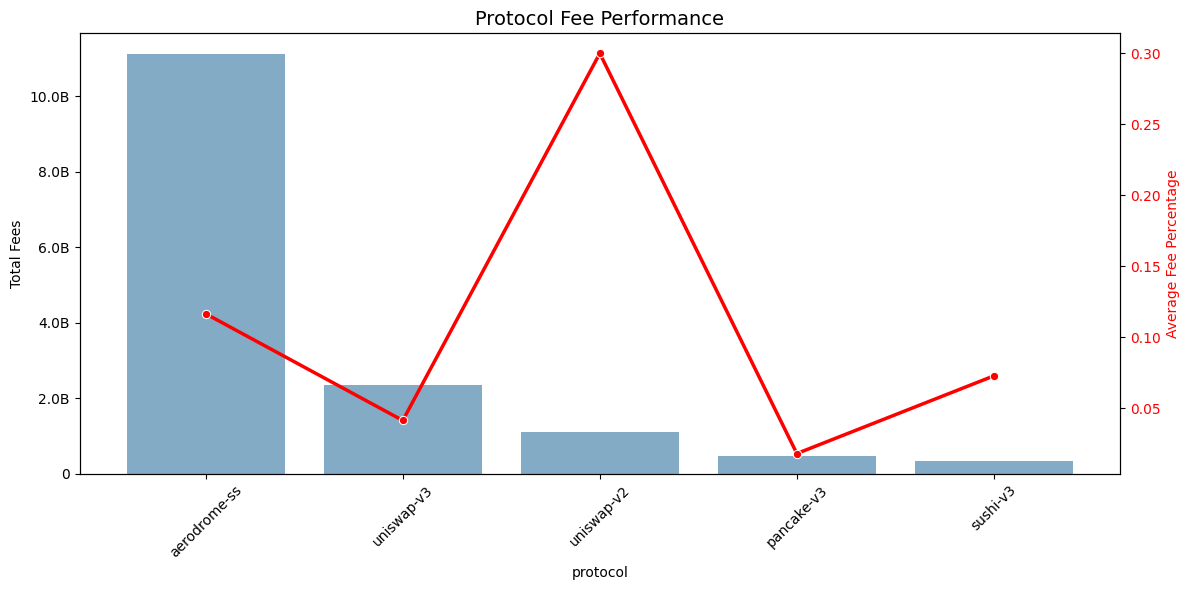

In [13]:
#Protocol fee analysis
fee_analysis = con.execute("""
SELECT
    protocol,
    AVG(fee_perc) AS avg_fee,
    SUM(amt_tokens_sold / POWER(10, t.decimals) * p.rate_close * fee_perc) AS total_fees
FROM reporting.swaps s
JOIN reporting.tokens t ON s.token_sold = t.token
JOIN reporting.prices p ON t.id = p.id 
    AND DATE_TRUNC('hour', s.block_timestamp) = p.dollar_date_use
GROUP BY protocol
HAVING total_fees > 0
ORDER BY total_fees DESC;
""").fetchdf()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

sns.barplot(data=fee_analysis, x='protocol', y='total_fees', ax=ax1, alpha=0.6)
sns.lineplot(data=fee_analysis, x='protocol', y='avg_fee', ax=ax2, 
            color='red', marker='o', linewidth=2.5)

ax1.set_title('Protocol Fee Performance', fontsize=14)
ax1.set_ylabel('Total Fees')
ax2.set_ylabel('Average Fee Percentage', color='red')
ax1.yaxis.set_major_formatter(usd_formatter)
ax2.tick_params(axis='y', labelcolor='red')
ax1.xaxis.set_tick_params(rotation=45)
plt.tight_layout()
plt.show()

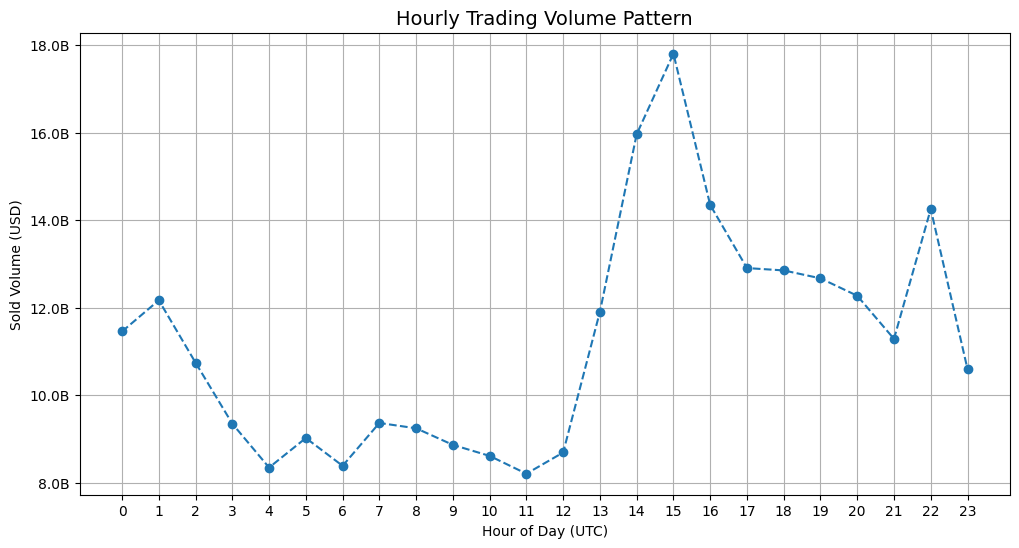

In [14]:
#When do the majority of the trades occur?
hourly_activity = con.execute("""
SELECT
    EXTRACT(HOUR FROM block_timestamp) AS hour,
    COUNT(*) AS trade_count,
    SUM(amt_tokens_sold / POWER(10, t.decimals) * p.rate_close) AS usd_value_sold
FROM reporting.swaps s
JOIN reporting.tokens t ON s.token_sold = t.token
JOIN reporting.prices p ON t.id = p.id 
    AND DATE_TRUNC('hour', s.block_timestamp) = p.dollar_date_use
GROUP BY hour
ORDER BY hour;
""").fetchdf()

plt.figure(figsize=(12, 6))
plt.plot(hourly_activity['hour'], hourly_activity['usd_value_sold'], 
        marker='o', linestyle='--')
plt.title('Hourly Trading Volume Pattern', fontsize=14)
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Sold Volume (USD)')
plt.xticks(range(0, 24))
plt.gca().yaxis.set_major_formatter(usd_formatter)
plt.grid(True)
plt.show()

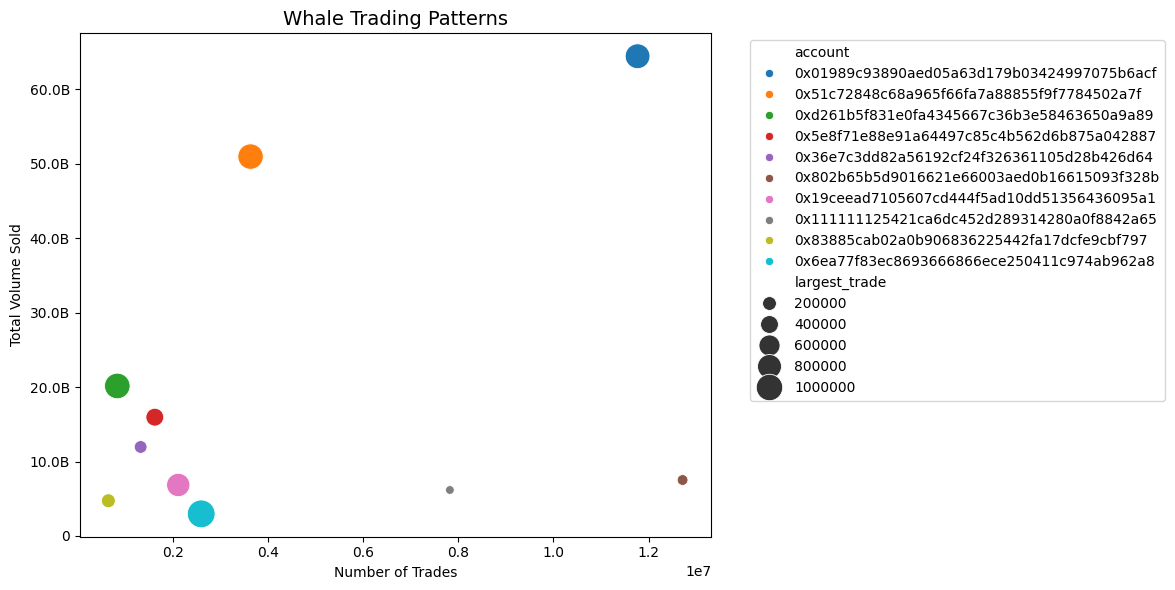

In [15]:
#check account activity
whale_activity = con.execute("""
WITH whale_stats AS (
    SELECT 
        account,
        COUNT(*) AS trade_count,
        SUM(amt_tokens_sold / POWER(10, t.decimals) * p.rate_close) AS usd_value_sold,
        MAX(amt_tokens_sold / POWER(10, t.decimals) * p.rate_close) AS largest_trade
    FROM reporting.swaps s
    JOIN reporting.tokens t ON s.token_sold = t.token
    JOIN reporting.prices p ON t.id = p.id 
        AND DATE_TRUNC('hour', s.block_timestamp) = p.dollar_date_use
    GROUP BY account
    HAVING usd_value_sold > 1000000  -- USD1M+ threshold
)
SELECT * FROM whale_stats
ORDER BY usd_value_sold DESC
LIMIT 10;
""").fetchdf()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=whale_activity, x='trade_count', y='usd_value_sold',
               size='largest_trade', hue='account', 
               sizes=(40, 400), palette='tab10')
plt.title('Whale Trading Patterns', fontsize=14)
plt.xlabel('Number of Trades')
plt.ylabel('Total Volume Sold')
plt.gca().yaxis.set_major_formatter(usd_formatter)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/d5/s2dpx1h57fx8pwt_52k13d7c0000gn/T/ipykernel_15114/373240557.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x=x, y=y, palette='viridis')


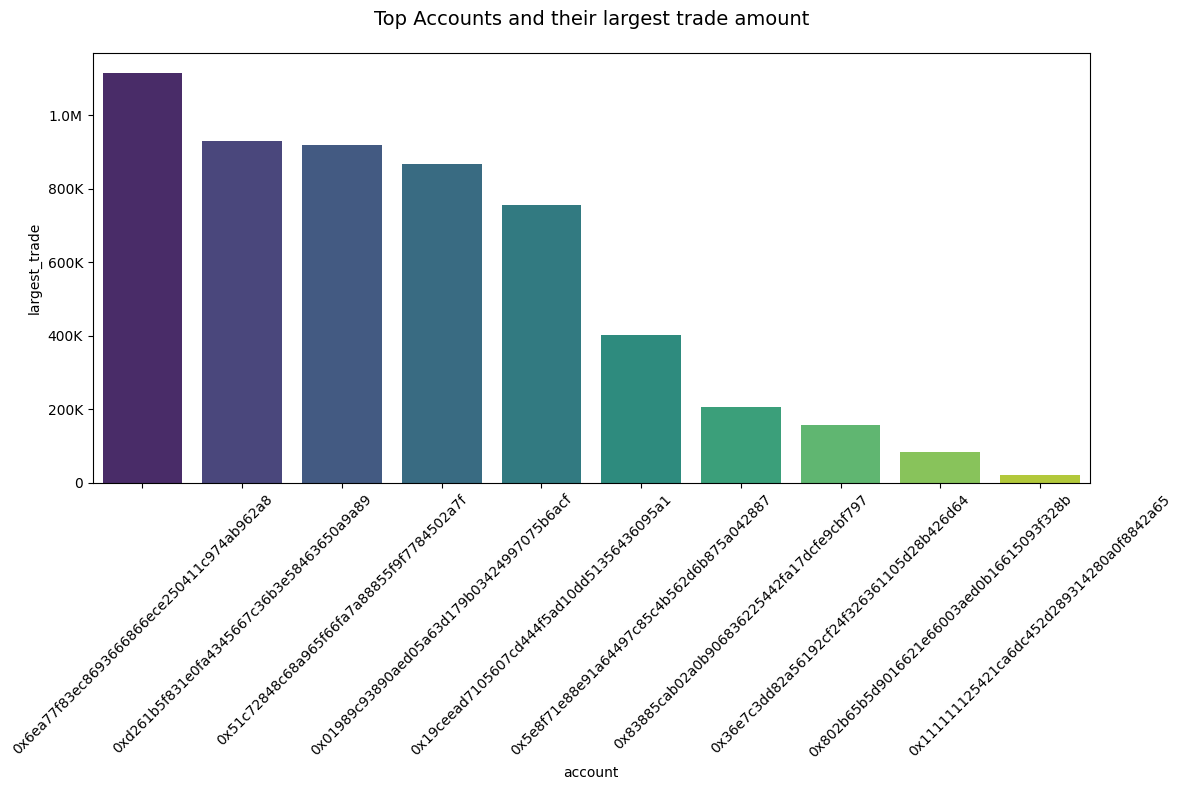

In [16]:
# Sort the dataframe by 'largest_trade' in descending order
whale_activity_sorted = whale_activity.sort_values(by='largest_trade', ascending=False)
#plot account with max trade
plot_styled_barchart(whale_activity_sorted, 'account', 'largest_trade', 
                    'Top Accounts and their largest trade amount')

/var/folders/d5/s2dpx1h57fx8pwt_52k13d7c0000gn/T/ipykernel_15114/373240557.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x=x, y=y, palette='viridis')


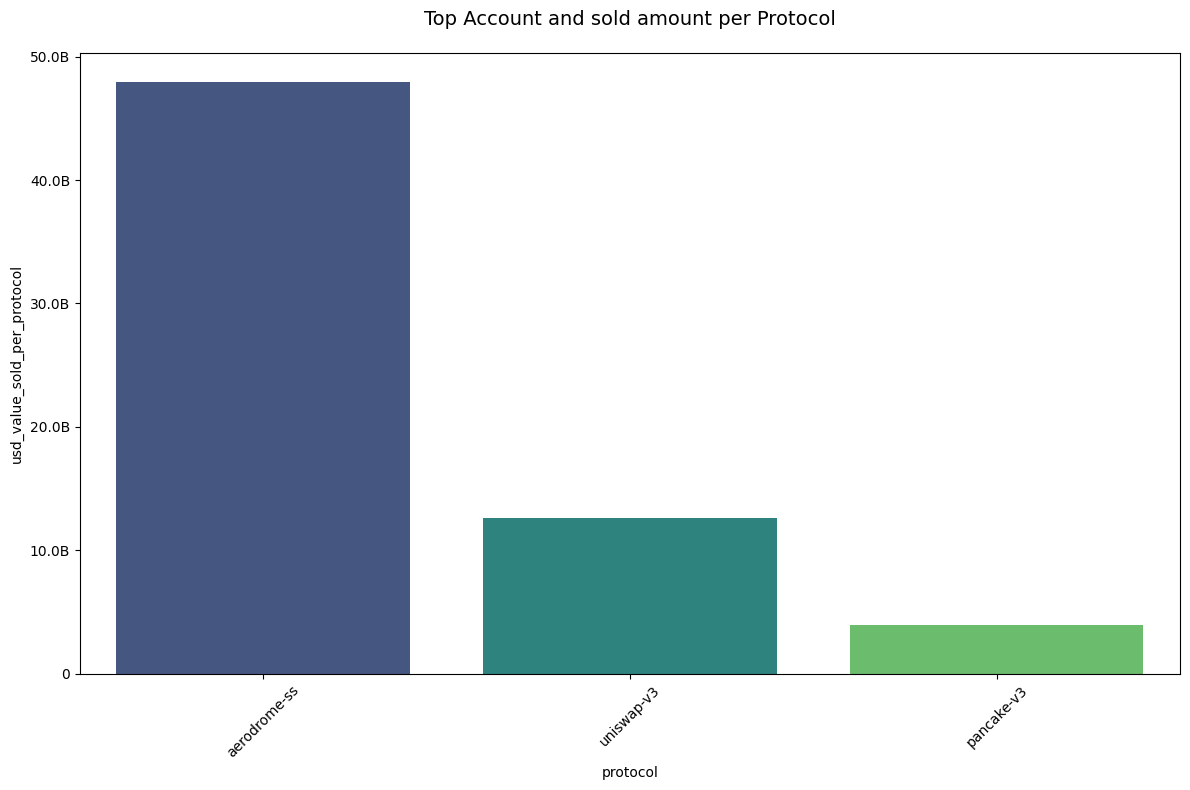

In [17]:
##curious to see that outlier account in terms of volume sold which protocol did it trade in > 3.0B in token value sold
top_whale_df = con.execute("""
WITH whale_stats AS (
    SELECT 
        account,
        COUNT(*) AS trade_count,
        SUM(amt_tokens_sold / POWER(10, t.decimals) * p.rate_close) AS usd_value_sold,
        MAX(amt_tokens_sold / POWER(10, t.decimals) * p.rate_close) AS largest_trade
    FROM reporting.swaps s
    JOIN reporting.tokens t ON s.token_sold = t.token
    JOIN reporting.prices p ON t.id = p.id 
        AND DATE_TRUNC('hour', s.block_timestamp) = p.dollar_date_use
    GROUP BY account
    HAVING usd_value_sold > 1000000  -- USD1M+ threshold
), top_whale as(
SELECT * FROM whale_stats
ORDER BY usd_value_sold DESC
LIMIT 1)
SELECT
s.account,
s.protocol,
SUM(amt_tokens_sold / POWER(10, t.decimals) * p.rate_close) AS usd_value_sold_per_protocol,
MAX(amt_tokens_sold / POWER(10, t.decimals) * p.rate_close) AS largest_trade_per_protocol
FROM 
  reporting.swaps s
  JOIN top_whale tw on s.account = tw.account
  JOIN reporting.tokens t ON s.token_sold = t.token
  JOIN reporting.prices p ON t.id = p.id 
        AND DATE_TRUNC('hour', s.block_timestamp) = p.dollar_date_use
    GROUP BY s.account,s.protocol
ORDER BY usd_value_sold_per_protocol desc
;
""").fetchdf()

plot_styled_barchart(top_whale_df, 'protocol', 'usd_value_sold_per_protocol', 
                    'Top Account and sold amount per Protocol')


/var/folders/d5/s2dpx1h57fx8pwt_52k13d7c0000gn/T/ipykernel_15114/373240557.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x=x, y=y, palette='viridis')


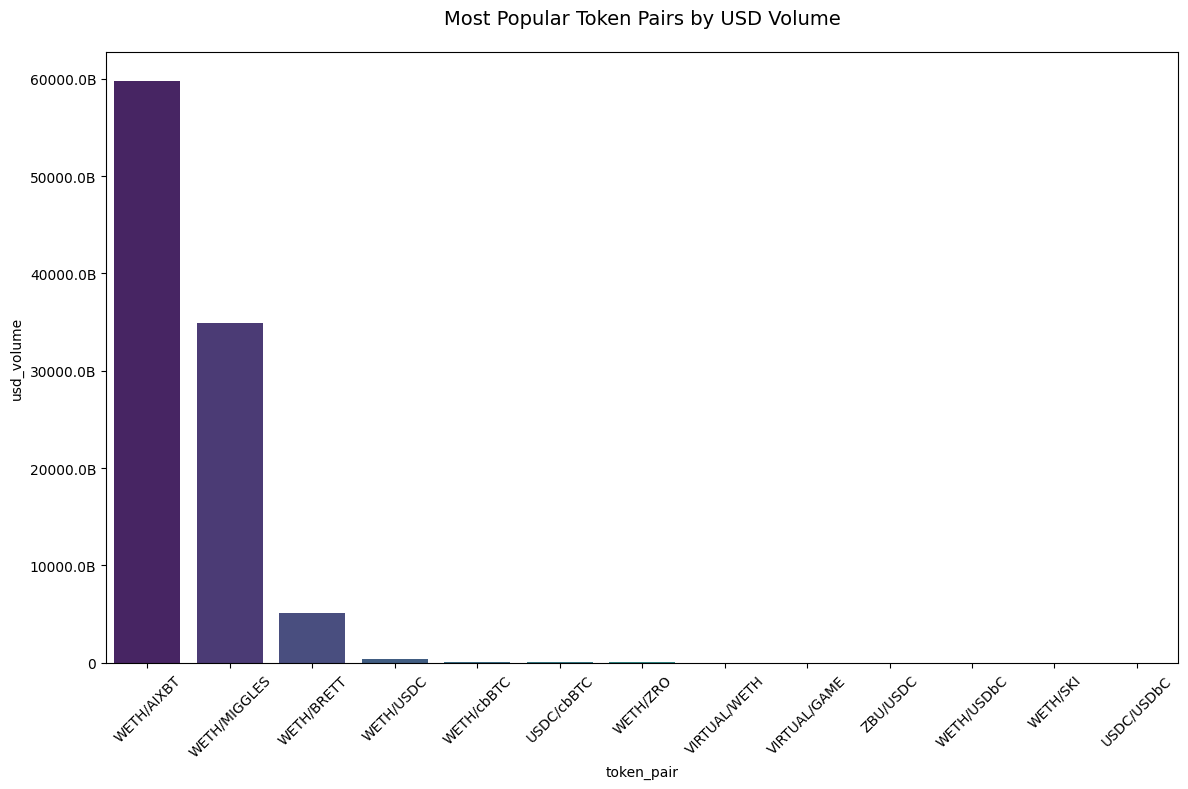

In [18]:
#popular token pairs
popular_pairs_df= con.execute( '''
SELECT
    t0.symbol || '/' || t1.symbol AS token_pair,
    COUNT(*) AS num_swaps,
    SUM(s.amt_tokens_sold / POWER(10, t0.decimals) * p.rate_close) AS usd_volume
FROM reporting.swaps s
JOIN reporting.tokens t0 ON s.token0 = t0.token
JOIN reporting.tokens t1 ON s.token1 = t1.token
JOIN reporting.prices p ON t0.id = p.id AND DATE_TRUNC('hour', s.block_timestamp) = p.dollar_date_use
GROUP BY  token_pair
ORDER BY  usd_volume DESC
LIMIT 100;
''').fetchdf()

plot_styled_barchart(popular_pairs_df, 'token_pair', 'usd_volume', 
                    'Most Popular Token Pairs by USD Volume')


In [ ]:
#Using token0 and token1 as this is crucial when analyzing token pairs data
#use token_bought and token_sold when checking outflows and inflows

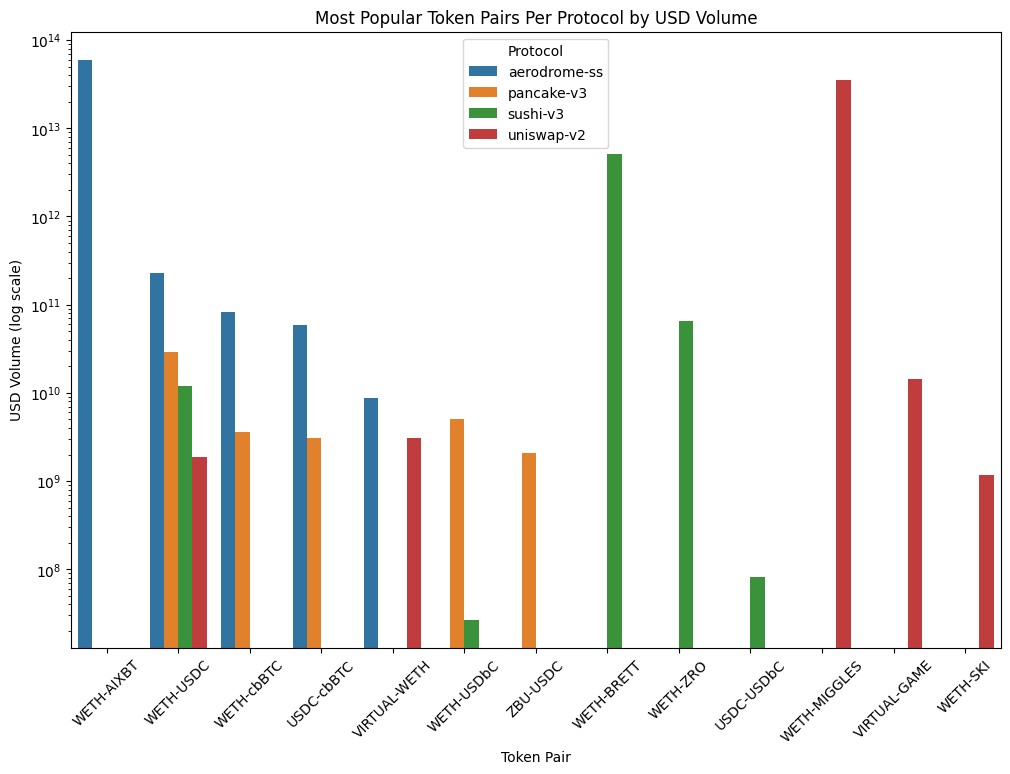

In [19]:
#popular token pairs by protocol
popular_pairs_df= con.execute( '''
SELECT
    s.protocol,
    t0.symbol || '-' || t1.symbol AS token_pair,
    COUNT(*) AS num_swaps,
    SUM(s.amt_tokens_sold / POWER(10, t0.decimals) * p.rate_close) AS usd_volume
FROM reporting.swaps s
JOIN reporting.tokens t0 ON s.token0 = t0.token
JOIN reporting.tokens t1 ON s.token1 = t1.token
JOIN reporting.prices p ON t0.id = p.id AND DATE_TRUNC('hour', s.block_timestamp) = p.dollar_date_use
GROUP BY s.protocol,  token_pair
ORDER BY s.protocol,  usd_volume DESC
LIMIT 20;
''').fetchdf()

# --- Visualization: Bar Plot ---
plt.figure(figsize=(12, 8))
sns.barplot(
    data=popular_pairs_df, 
    x='token_pair', 
    y='usd_volume',
    hue ='protocol'
)
plt.title('Most Popular Token Pairs Per Protocol by USD Volume')
plt.xlabel('Token Pair')
plt.ylabel('USD Volume (log scale)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(title='Protocol')
plt.show()

Top Tokens by Overall Activity:


,symbol,total_bought_usd,total_sold_usd
0,WETH,"111,576,511,258.17","116,040,788,730.90"
1,USDC,"105,414,722,779.18","102,578,192,366.78"
2,cbBTC,"40,115,035,253.83","38,588,431,879.18"
3,VIRTUAL,"5,787,072,291.78","5,784,246,122.52"
4,ZBU,"2,958,535,287.94","2,971,561,222.06"
5,AIXBT,"1,277,056,986.72","1,393,595,738.50"
6,USDbC,"1,285,305,165.48","1,282,455,362.89"
7,SKI,"290,109,720.41","299,232,112.34"
8,MIGGLES,"207,760,859.50","212,418,584.25"
9,GAME,"109,979,789.64","115,455,040.14"


<Figure size 1400x700 with 0 Axes>

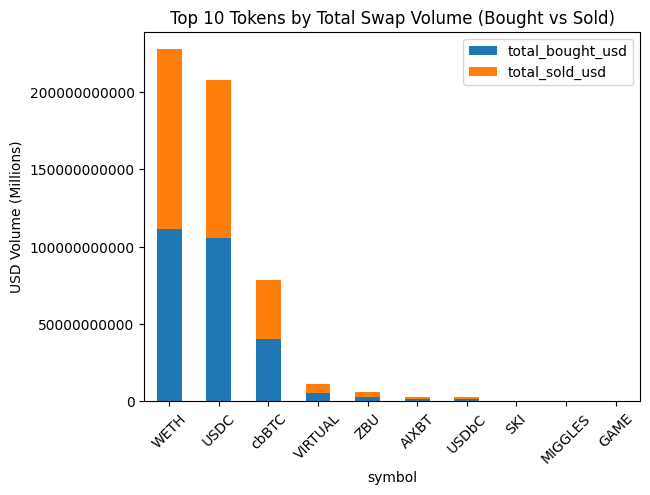

In [20]:
#most bought and sold token whole month
most_bought_sold_token_df =con.execute( """
WITH token_flows AS (
    SELECT 
        token_bought AS token, 
        amt_tokens_bought AS amount, 
        'bought' AS action,
        block_timestamp
    FROM reporting.swaps
    UNION ALL
    SELECT 
        token_sold AS token,
        amt_tokens_sold AS amount,
        'sold' AS action,
        block_timestamp
    FROM reporting.swaps
)
SELECT
    t.symbol,
    SUM(CASE WHEN tf.action = 'bought' 
        THEN (tf.amount / POWER(10, t.decimals)) * p.rate_close 
        ELSE 0 END) AS total_bought_usd,
    SUM(CASE WHEN tf.action = 'sold' 
        THEN (tf.amount / POWER(10, t.decimals)) * p.rate_close 
        ELSE 0 END) AS total_sold_usd
FROM token_flows tf
JOIN reporting.tokens t ON tf.token = t.token
JOIN reporting.prices p 
    ON t.id = p.id 
    AND DATE_TRUNC('hour', tf.block_timestamp) = p.dollar_date_use
GROUP BY t.symbol
ORDER BY total_bought_usd + total_sold_usd DESC
LIMIT 20;
""").fetchdf()


print("Top Tokens by Overall Activity:")
display(most_bought_sold_token_df.head(10))

# Visualization for whole month
plt.figure(figsize=(14, 7))
top_tokens = most_bought_sold_token_df.head(10).set_index('symbol')
top_tokens[['total_bought_usd', 'total_sold_usd']].plot(kind='bar', stacked=True)
plt.title('Top 10 Tokens by Total Swap Volume (Bought vs Sold)')
plt.ylabel('USD Volume (Millions)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


Top Tokens in aerodrome-ss:


,protocol,symbol,total_bought_usd,total_sold_usd
0,aerodrome-ss,WETH,"76,853,844,558.36","81,043,561,391.16"
1,aerodrome-ss,USDC,"71,406,121,919.50","68,845,508,895.49"
2,aerodrome-ss,cbBTC,"35,173,015,939.71","33,612,994,465.52"
3,aerodrome-ss,VIRTUAL,"2,195,446,342.98","2,175,659,482.86"
4,aerodrome-ss,AIXBT,"1,277,056,986.72","1,393,595,738.50"


<Figure size 1200x600 with 0 Axes>

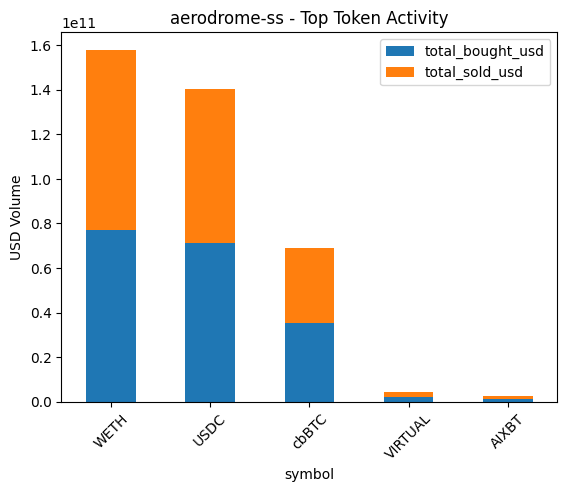


Top Tokens in pancake-v3:


,protocol,symbol,total_bought_usd,total_sold_usd
5,pancake-v3,WETH,"9,423,665,010.59","9,454,316,581.97"
6,pancake-v3,USDC,"8,563,144,866.44","8,530,130,968.21"
7,pancake-v3,cbBTC,"1,688,770,031.43","1,691,461,654.55"
8,pancake-v3,USDbC,"1,268,306,918.78","1,265,496,678.84"
9,pancake-v3,ZBU,"514,428,209.08","524,380,151.80"


<Figure size 1200x600 with 0 Axes>

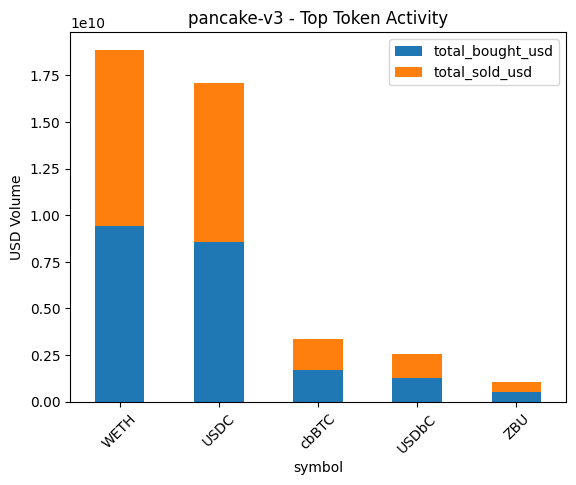


Top Tokens in sushi-v3:


,protocol,symbol,total_bought_usd,total_sold_usd
10,sushi-v3,WETH,"3,015,725,943.32","3,038,201,942.43"
11,sushi-v3,USDC,"2,990,584,451.96","2,972,522,091.33"
12,sushi-v3,BRETT,"20,540,948.05","23,746,014.23"
13,sushi-v3,ZRO,"17,423,804.21","17,439,116.32"
14,sushi-v3,USDbC,"16,998,246.70","16,958,684.05"


<Figure size 1200x600 with 0 Axes>

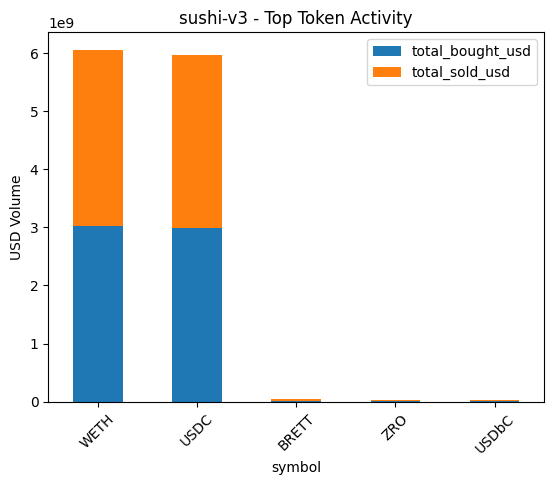

In [21]:
#most bought and sold token per protocol
# Per Protocol Analysis
most_bought_sold_token_protocol_df =con.execute( """
WITH token_flows AS (
    SELECT 
        protocol,
        token_bought AS token, 
        amt_tokens_bought AS amount, 
        'bought' AS action,
        block_timestamp
    FROM reporting.swaps
    UNION ALL
    SELECT 
        protocol,
        token_sold AS token,
        amt_tokens_sold AS amount,
        'sold' AS action,
        block_timestamp
    FROM reporting.swaps
)
SELECT
    tf.protocol,
    t.symbol,
    SUM(CASE WHEN tf.action = 'bought' 
        THEN (tf.amount / POWER(10, t.decimals)) * p.rate_close 
        ELSE 0 END) AS total_bought_usd,
    SUM(CASE WHEN tf.action = 'sold' 
        THEN (tf.amount / POWER(10, t.decimals)) * p.rate_close 
        ELSE 0 END) AS total_sold_usd
FROM token_flows tf
JOIN reporting.tokens t ON tf.token = t.token
JOIN reporting.prices p 
    ON t.id = p.id 
    AND DATE_TRUNC('hour', tf.block_timestamp) = p.dollar_date_use
GROUP BY tf.protocol, t.symbol
ORDER BY tf.protocol, total_bought_usd + total_sold_usd DESC;
""").fetchdf()


# Analyze top 3 protocols
protocols = most_bought_sold_token_protocol_df['protocol'].unique()[:3]  

for protocol in protocols:
    proto_df = most_bought_sold_token_protocol_df[most_bought_sold_token_protocol_df['protocol'] == protocol].head(10)
    
    print(f"\nTop Tokens in {protocol}:")
    display(proto_df)
    
    plt.figure(figsize=(12, 6))
    proto_df.set_index('symbol')[['total_bought_usd', 'total_sold_usd']].plot(kind='bar', stacked=True)
    plt.title(f'{protocol} - Top Token Activity')
    plt.ylabel('USD Volume')
    plt.xticks(rotation=45)
    plt.show()